In [55]:
import numpy as np 
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
import random

In [56]:
np.random.seed(0)

In [57]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() 

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [59]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"




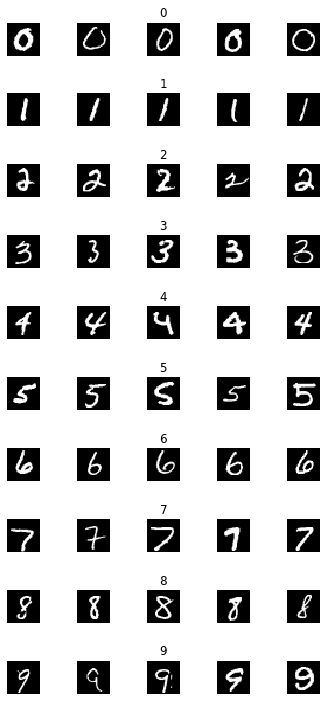

In [60]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if (i==2):
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

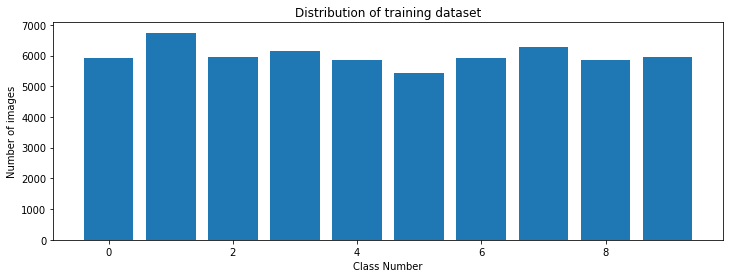

In [61]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [62]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [63]:
X_train = X_train/255 
X_test = X_test/255

In [64]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [65]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [66]:
model = create_model()
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.5260 - accuracy: 0.8339 - val_loss: 0.2958 - val_accuracy: 0.9135
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3235 - accuracy: 0.9036 - val_loss: 0.2515 - val_accuracy: 0.9282
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2789 - accuracy: 0.9167 - val_loss: 0.2465 - val_accuracy: 0.9297
Epoch 4/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2668 - accuracy: 0.9193 - val_loss: 0.2231 - val_accuracy: 0.9345
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2457 - accuracy: 0.9251 - val_loss: 0.2143 - val_accuracy: 0.9390
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2294 - accuracy: 0.9312 - val_loss: 0.2137 - val_accuracy: 0.9388
Epoch 7/10
54000/54000 [==============================] - 1s 20us/ste

Text(0.5, 0, 'epoch')

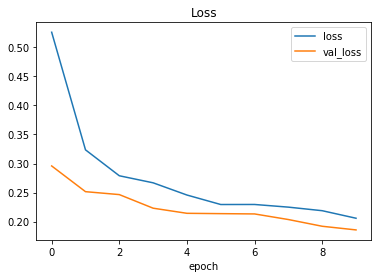

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

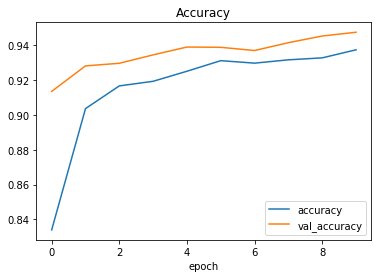

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [70]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.23090755518898368
Test accuracy: 0.9312000274658203


In [71]:
import requests
from PIL import Image

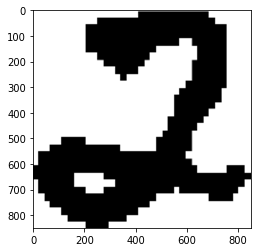

In [72]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [73]:
import cv2


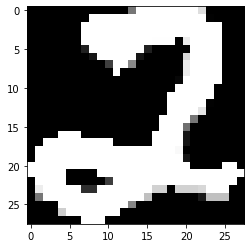

In [74]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [75]:
img = img/255
img = img.reshape(1, 784)

In [76]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]
